In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import re



In [4]:
df = pd.read_csv('report', sep=r' \| ', engine='python')
df

,algo,arch,scale,query,time,relation,tuple,sensitivity,all_table_tstar,test pass
0,Elastic,tpch,0.0001,q1,0.009,REGION,any,30,"[(REGION, 'any', 30), (NATION, 'any', 6), (CUS...",Unknown
1,Elastic,tpch,0.0001,q2,0.004,SUPPLIER,any,24,"[(SUPPLIER, 'any', 24), (PART, 'any', 24), (PA...",Unknown
2,Elastic,tpch,0.0001,q3,0.009,LINEITEM,any,500,"[(LINEITEM, 'any', 500), (REGION, 'any', 120),...",Unknown
3,Elastic,tpch,0.0010,q1,0.008,REGION,any,9450,"[(REGION, 'any', 9450), (NATION, 'any', 1890),...",Unknown
4,Elastic,tpch,0.0010,q2,0.007,SUPPLIER,any,3840,"[(SUPPLIER, 'any', 3840), (PART, 'any', 192), ...",Unknown
5,Elastic,tpch,0.0010,q3,0.018,SUPPLIER,any,4800000,"[(SUPPLIER, 'any', 4800000), (REGION, 'any', 1...",Unknown
6,Elastic,tpch,0.0100,q1,0.030,REGION,any,80640,"[(REGION, 'any', 80640), (NATION, 'any', 16128...",Unknown
7,Elastic,tpch,0.0100,q2,0.030,SUPPLIER,any,4080,"[(SUPPLIER, 'any', 4080), (PART, 'any', 204), ...",Unknown
8,Elastic,tpch,0.0100,q3,0.059,REGION,any,120350000,"[(REGION, 'any', 120350000), (SUPPLIER, 'any',...",Unknown
9,Elastic,tpch,0.1000,q1,0.246,REGION,any,797580,"[(REGION, 'any', 797580), (NATION, 'any', 1595...",Unknown


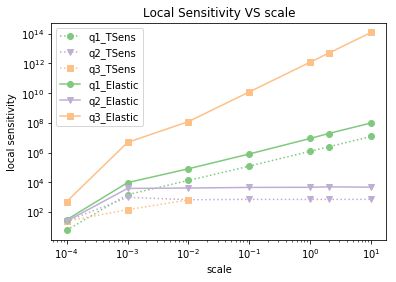

In [44]:
def _sens_change_by_n(df, q, ax, algo, color, marker):
    data = df.query('query == "{q}" & algo == "{algo}"'.format(q=q, algo=algo))
    x, y = data['scale'], data['sensitivity']
    if algo == 'TSens':
        ax.plot(x, y, linestyle='dotted', marker=marker, color=color, label='{q}_{algo}'.format(q=q, algo=algo))
    elif algo == 'Elastic':
        ax.plot(x, y, linestyle='solid', marker=marker, color=color, label='{q}_{algo}'.format(q=q, algo=algo))
    ax.legend()
    return data

def sens_change_by_n(df):
    fig, ax = plt.subplots()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('scale')
    ax.set_ylabel('local sensitivity')
    ax.set_title('Local Sensitivity VS scale')
    cmap = cm.get_cmap('Accent')
    colors = cmap.colors
    c1, c2, c3 = colors[:3]
    m1, m2, m3 = ['o', 'v', 's']
    _sens_change_by_n(df, 'q1', ax, 'TSens', c1, m1)
    _sens_change_by_n(df, 'q2', ax, 'TSens', c2, m2)
    _sens_change_by_n(df, 'q3', ax, 'TSens', c3, m3)
    _sens_change_by_n(df, 'q1', ax, 'Elastic', c1, m1)
    _sens_change_by_n(df, 'q2', ax, 'Elastic', c2, m2)
    _sens_change_by_n(df, 'q3', ax, 'Elastic', c3, m3)
    plt.show()
    fig.savefig('./graphs/sens_change_by_n.pdf')
    

sens_change_by_n(df)

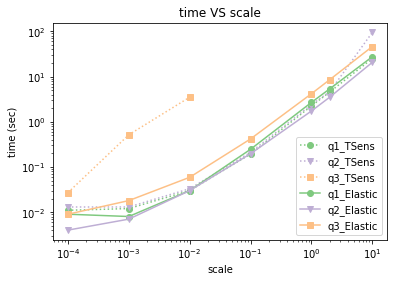

In [45]:
def _time_change_by_n(df, q, ax, algo, color, marker):
    data = df.query('query == "{q}" & algo == "{algo}"'.format(q=q, algo=algo))
    x, y = data['scale'], data['time']
    if algo == 'TSens':
        ax.plot(x, y, linestyle='dotted', marker=marker, color=color, label='{q}_{algo}'.format(q=q, algo=algo))
    elif algo == 'Elastic':
        ax.plot(x, y, linestyle='solid', marker=marker, color=color, label='{q}_{algo}'.format(q=q, algo=algo))
    ax.legend()
    return data

def time_change_by_n(df):
    fig, ax = plt.subplots()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('scale')
    ax.set_ylabel('time (sec)')
    ax.set_title('time VS scale')
    cmap = cm.get_cmap('Accent')
    colors = cmap.colors
    c1, c2, c3 = colors[:3]
    m1, m2, m3 = ['o', 'v', 's']
    _time_change_by_n(df, 'q1', ax, 'TSens', c1, m1)
    _time_change_by_n(df, 'q2', ax, 'TSens', c2, m2)
    _time_change_by_n(df, 'q3', ax, 'TSens', c3, m3)
    _time_change_by_n(df, 'q1', ax, 'Elastic', c1, m1)
    _time_change_by_n(df, 'q2', ax, 'Elastic', c2, m2)
    _time_change_by_n(df, 'q3', ax, 'Elastic', c3, m3)
    plt.show()
    fig.savefig('./graphs/time_change_by_n.pdf')

time_change_by_n(df)

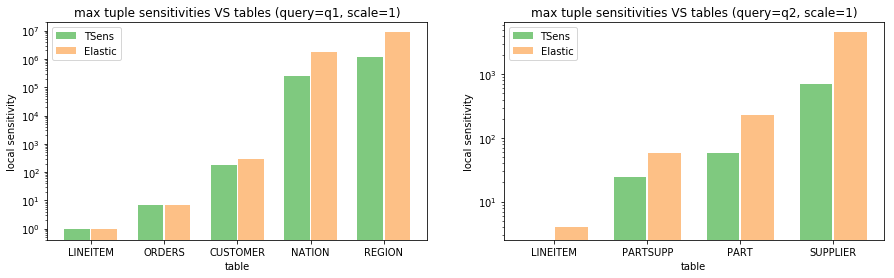

In [46]:
def fetch_data_sens_change_by_table(df, q, scale, algo, cutoff):
    data = df.query('query == "{q}" & algo == "{algo}" & scale == {scale}'.format(q=q, algo=algo, scale=scale))
    data = str(data['all_table_tstar'].tolist()[0])
    data = re.sub(r'\((\w+),', r'("\1",', data)
    data = eval(data)
    data = list(zip(*(sorted(data))))
    x, _, y = data
    x, y = list(x), list(y)
    labels, sens = x, y
    if cutoff:
        sens = [min(sen, cutoff) for sen in sens]
    return labels, sens
    
def _sens_change_by_table(ax, df, q, scale, cutoff=None):
    labels, TSens_sens = fetch_data_sens_change_by_table(df, q, scale, algo='TSens', cutoff=cutoff)
    labels, Elastic_sens = fetch_data_sens_change_by_table(df, q, scale, algo='Elastic', cutoff=cutoff)
    
    labels, TSens_sens, Elastic_sens = list(zip(*sorted(zip(labels, TSens_sens, Elastic_sens), key=lambda pair: pair[2])))
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    cmap = cm.get_cmap('Accent')
    colors = cmap.colors
    c1, c2, c3 = colors[:3]
    
    rects1 = ax.bar(x - width/2 - 0.01, TSens_sens, width, label='TSens', color=c1)
    rects2 = ax.bar(x + width/2 + 0.01, Elastic_sens, width, label='Elastic', color=c3)
                
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_title('max tuple sensitivities VS tables (query={q}, scale={scale})'.format(q=q, scale=scale))
    ax.legend()

def sens_change_by_table(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
    axes = (ax1, ax2)
    for ax in axes:
        #ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('table')
        ax.set_ylabel('local sensitivity')

    m1, m2, m3 = ['o', 'v', 's']
    _sens_change_by_table(ax1, df, 'q1','1')
    _sens_change_by_table(ax2, df, 'q2','1')
    #_sens_change_by_table(ax3, df, 'q3','0.01', cutoff=10**3)
    #_sens_change_by_table(df, 'q2', ax2, '10', 'TSens', c2)
    #_sens_change_by_table(df, 'q3', ax3, '0.01', 'TSens', c3)
    plt.show()
    fig.savefig('./graphs/sens_change_by_table.pdf')

sens_change_by_table(df)

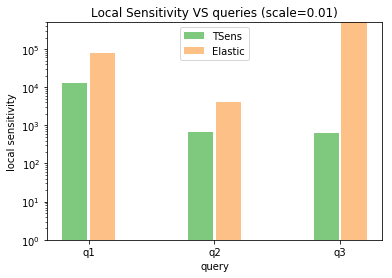

In [47]:
def fetch_data_sens_change_by_query(df, scale, algo, cutoff):
    data = df.query('algo == "{algo}" & scale == {scale}'.format(algo=algo, scale=scale))
    data = data[['query', 'sensitivity']].to_xarray()
    labels = data.query.values
    sens = data.sensitivity.values
    if cutoff:
        sens = [min(sen, cutoff) for sen in sens]
    return labels, sens
    
def _sens_change_by_query(ax, df, q, scale, cutoff=None):
    labels, TSens_sens = fetch_data_sens_change_by_query(df, scale, algo='TSens', cutoff=cutoff)
    labels, Elastic_sens = fetch_data_sens_change_by_query(df, scale, algo='Elastic', cutoff=cutoff)
    
    labels, TSens_sens, Elastic_sens = list(zip(*sorted(zip(labels, TSens_sens, Elastic_sens), key=lambda pair: pair[0])))
    
    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    cmap = cm.get_cmap('Accent')
    colors = cmap.colors
    c1, c2, c3 = colors[:3]
    
    rects1 = ax.bar(x - width/2-0.01, TSens_sens, width, label='TSens', color=c1)
    rects2 = ax.bar(x + width/2+0.01, Elastic_sens, width, label='Elastic', color=c3)
                
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_title('Local Sensitivity VS queries (scale={scale})'.format(q=q, scale=scale))
    ax.legend()

def sens_change_by_query(df):
    fig, ax = plt.subplots()
    #ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('query')
    ax.set_ylabel('local sensitivity')
    ax.set_ylim(1, 5*10**5)
    cmap = cm.get_cmap('Accent')
    colors = cmap.colors
    c1, c2, c3 = colors[:3]
    m1, m2, m3 = ['o', 'v', 's']
    _sens_change_by_query(ax, df, 'q1','0.01')
    plt.show()
    fig.savefig('./graphs/sens_change_by_query.pdf')

sens_change_by_query(df)

In [16]:
!pip install xarray --user

  Using cached https://files.pythonhosted.org/packages/7e/84/e1127b7807a1a98da6d977939b11e89cb924b8b6d8917d9894eb8f39c230/xarray-0.14.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/9b/52e228545d14f14bb2a1622e225f38463c8726645165e1cb7dde95bfe6d4/pandas-0.25.1-cp36-cp36m-manylinux1_x86_64.whl
You are using pip version 10.0.1, however version 19.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
!conda install xarray -y

Solving environment: | 

In [50]:
def get_db_histogram(scale='1'):
    import db
    conn = db.use_db('tpch', scale)
    relations = ['REGION', 'NATION', 'CUSTOMER', 'ORDERS', 'LINEITEM', 'SUPPLIER', 'PART', 'PARTSUPP']
    counts = []
    for reln_name in relations:
        sql = "SELECT COUNT(*) FROM {reln}".format(reln=reln_name)
        cur = db.run_sql(sql, conn)
        res = cur.fetchone()[0]
        counts.append(res)
    return relations, counts

relations, counts = get_db_histogram()

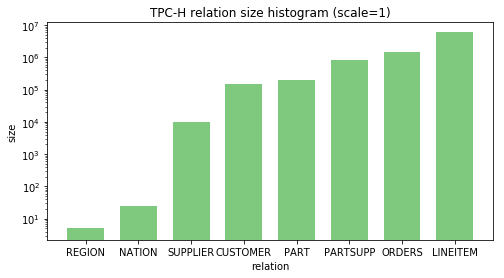

In [64]:
def db_histogram(scale='1'):
    relations, counts = get_db_histogram(scale)
    relations, counts = list(zip(*sorted(zip(relations, counts), key=lambda pair: pair[1])))
    
    cmap = cm.get_cmap('Accent')
    colors = cmap.colors
    c1, c2, c3, c4 = colors[:4]
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.set_yscale('log')
    ax.set_xlabel('relation')
    ax.set_ylabel('size')
    ax.set_title('TPC-H relation size histogram (scale=1)')
    ax.bar(relations, counts, color=c1, width=0.7)
    plt.show()
    fig.savefig('./graphs/db_size.pdf')

db_histogram()

In [109]:
# Check the average improvement of sensitivity for q1 and q2 after scale 0.01
def get_sens_ratio(scale, query):
    elast = df.query('algo=="Elastic" & scale == {scale} & query == "{query}"'.format(query=query, scale=scale))['sensitivity'].tolist()[0]
    tsens = df.query('algo=="TSens" & scale == {scale} & query == "{query}"'.format(query=query, scale=scale))['sensitivity'].tolist()[0]
    ratio = np.float64(elast*1.0/tsens)
    return ratio

for query in ['q1', 'q2']:
    ratios = []
    for scale in [0.01, 0.1, 1, 10]:
        ratio = get_sens_ratio(scale, query)
        ratios.append(ratio)
    print(query, np.mean(ratios).round(0))

q1 7.0
q2 6.0


In [110]:
get_sens_ratio(0.01, 'q3').round(0)

186012.0

In [116]:
# Check the average loss of time for q1 and q2 after scale 0.01
# Here if we say, TSens takes {ratio} time of what Elastic takes
def get_time_ratio(scale, query):
    elast = df.query('algo=="Elastic" & scale == {scale} & query == "{query}"'.format(query=query, scale=scale))['time'].tolist()[0]
    tsens = df.query('algo=="TSens" & scale == {scale} & query == "{query}"'.format(query=query, scale=scale))['time'].tolist()[0]
    #ratio = np.float64(elast*1.0/tsens)
    ratio = np.float64(tsens*1.0/elast)
    return ratio

for query in ['q1', 'q2']:
    ratios = []
    for scale in [0.01, 0.1, 1, 10]:
        ratio = get_time_ratio(scale, query)
        ratios.append(ratio)
    print(query, np.mean(ratios).round(3))

q1 0.883
q2 2.041


In [117]:
get_time_ratio(0.01, 'q3').round(3)

59.288

In [124]:
high_sens = df.query('algo=="Elastic" & scale==0.01 & query=="q3"')['sensitivity'].tolist()[0]
np.format_float_scientific(np.float64(high_sens))

'1.2035e+08'

In [126]:
for query in ['q1', 'q2', 'q3']:
    ratio = get_sens_ratio(0.01, query)
    print(ratio)

6.110942709912095
6.107784431137724
186012.36476043277


In [14]:
df.query("algo=='TSens' & scale==1 & query=='q1'")['all_table_tstar'].to_xarray()

<xarray.DataArray 'all_table_tstar' (index: 1)>
array(["[(REGION, [('regionkey', 3)], 1212077), (NATION, [('regionkey', 3), ('nationkey', 6)], 246415), (CUSTOMER, [('nationkey', 22), ('custkey', 143500)], 178), (ORDERS, [('custkey', 129976), ('orderkey', 4563943)], 7), (LINEITEM, [('orderkey', 3669159)], 1)]"],
      dtype=object)
Coordinates:
  * index    (index) int64 25

In [15]:
df.query("algo=='Elastic' & scale==1 & query=='q1'")['all_table_tstar'].to_xarray()

<xarray.DataArray 'all_table_tstar' (index: 1)>
array(["[(REGION, 'any', 8841035), (NATION, 'any', 1768207), (CUSTOMER, 'any', 287), (ORDERS, 'any', 7), (LINEITEM, 'any', 1)]"],
      dtype=object)
Coordinates:
  * index    (index) int64 12